In [1]:
import numpy as np
import matplotlib.pyplot as plt
import get_data

In [2]:
def calib_SR(bbp):
    return bbp-1.2e-4
def calib_BB9(bbp):
    return bbp-0.7e-4
def calib_HS6(bbp):
    return bbp*1.26 + 0.7e-4
def calib_RR(bbp):
    return bbp
def calib_SG(bbp):
    return bbp-0.5e-4
def calib_WW(bbp):
    return bbp-0.5e-4
def calib_LF(bbp):
    return bbp*1.98 - 35.2e-4
def calib_Argo(bbp):
    return bbp-0.3e-4

def calib_SR(bbp):
    return bbp+0.6e-4
def calib_BB9(bbp):
    return bbp+1.2e-4
def calib_HS6(bbp):
    return bbp*1.5 + 1.4e-4
def calib_RR(bbp):
    return bbp
def calib_SG(bbp):
    return bbp+0.7e-4
def calib_WW(bbp):
    return bbp+0.6e-4
def calib_LF(bbp):
    return bbp*2.36 - 41.3e-4
def calib_Argo(bbp):
    return bbp+1.2e-4

In [18]:
fn = '%s/CTD_Ride'%data_folder
data = get_data.get_FLBB_SR(fn,verbose=True)

Output is time, lat, lon, station, T, S, z, VSF


(0, 0.0001)

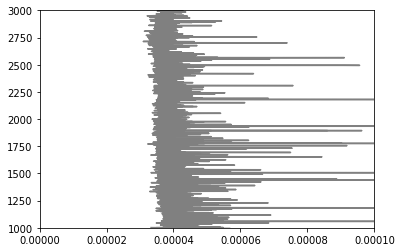

In [19]:
for i in range(len(data[6])):
    plt.plot(data[7][i],data[6][i],color='0.5')
plt.ylim([1000,3000])
plt.xlim([0,0.0001])

In [15]:
fn = '%s/CTD_Revelle'%data_folder
data = get_data.get_FLBB_RR(fn,verbose=True)

Output is time, lat, lon, station, T, S, z, VSF


(0, 0.0001)

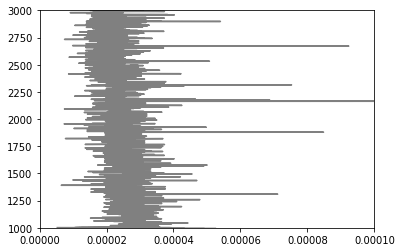

In [17]:
for i in range(len(data[6])):
    plt.plot(data[7][i],data[6][i],color='0.5')
plt.ylim([1000,3000])
plt.xlim([0,0.0001])

In [20]:
2e-5*2*np.pi*1.14

0.00014325662500369458

In [4]:
dep = np.arange(5,1000,10)
data_folder = '/Users/zerickso/Research/EXPORTS/Pacific/Data/SeaBASS'


In [4]:
# FLBB-SR
fn = '%s/CTD_Ride'%data_folder
data = get_data.get_FLBB_SR(fn,verbose=True)
SR_t = data[0]
SR_bbp = np.array([np.interp(dep,z[np.isfinite(VSF)],VSF[np.isfinite(VSF)],left=np.nan,right=np.nan)
                   *2*np.pi*1.14 for z,VSF in zip(data[6],data[7])])
SR_deepval = np.nanmedian(SR_bbp[:,40:50])
print('deep value:',SR_deepval)

print('Real deep value:',np.nanmedian(SR_bbp[:,80::]))

Output is time, lat, lon, station, T, S, z, VSF
deep value: 0.000321979170778993
Real deep value: 0.00030355489195335323


In [5]:
# BB9-RR
fn = '%s/BB9_RR'%data_folder
data = get_data.get_BB9_RR(fn,700,get_dives=range(1,32),verbose=True) # first dive has weird vars, 32 total dives
BB9_t = data[0]
BB9_bbp = np.array([np.interp(dep,z[np.isfinite(VSF)],VSF[np.isfinite(VSF)],left=np.nan,right=np.nan)
                    *2*np.pi*1.04 for z,VSF in zip(data[5],data[6])])

Output is time, lat, lon, T, S, z, VSF, VSF_sd


In [6]:
# HS6-RR
fn = '%s/HydroScat_Revelle'%data_folder
data = get_data.get_HS(fn,verbose=True)
HS6_t = data[0]
HS6_bbp = np.array([np.interp(dep,z[np.isfinite(VSF)],VSF[np.isfinite(VSF)],left=np.nan,right=np.nan)
                    *2*np.pi*1.14 for z,VSF in zip(data[5],data[6])])

Output is time, lat, lon, T, S, z, VSF, VSF_sd


In [7]:
# FLBB-RR
fn = '%s/CTD_Revelle'%data_folder
data = get_data.get_FLBB_RR(fn,verbose=True)
inds = data[0]>241
RR_t = data[0][inds]
RR_bbp = np.array([np.interp(dep,z[np.isfinite(VSF)],VSF[np.isfinite(VSF)],left=np.nan,right=np.nan)
                   *2*np.pi*1.14 for z,VSF in zip(data[6][inds],data[7][inds])])
RR_deepval = np.nanmedian(RR_bbp[:,40:50])
print('deep value:',RR_deepval)

print('Real deep value:',np.nanmedian(RR_bbp[:,80::]))

Output is time, lat, lon, station, T, S, z, VSF
deep value: 0.00019642151224486662
Real deep value: 0.00018992139392417622


In [8]:
# BB2FL-SG
fn = '%s/../SG219/sg219_EXPORTS_Jul18_level2.nc'%data_folder
data = get_data.get_SG(fn,700,verbose=True)
inds = data[0]<250
SG_t = data[0][inds]
SG_bbp = np.array([np.interp(dep,z[np.isfinite(VSF)],VSF[np.isfinite(VSF)],left=np.nan,right=np.nan)
                   *2*np.pi*1.04 for z,VSF in zip(data[5][inds],data[6][inds])])
SG_deepval = np.nanmedian(SG_bbp[:,40:50])
print('deep value:',SG_deepval)
SG_bbp[:,dep>500] = np.nan # only a small number of dives go that deep, so doesn't make sense to do statistics

/Users/zerickso/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3530: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  part.partition(kth)
/Users/zerickso/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:994: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


Output is time, lat, lon, T, S, z, VSF
deep value: 0.00023705534457376333


In [9]:
# FL2BB-WW
fn = '%s/Wirewalker'%data_folder 
data = get_data.get_WW(fn,verbose=True)
WW_t = data[0]
WW_bbp = np.array([np.interp(dep,z[np.isfinite(VSF)],VSF[np.isfinite(VSF)],left=np.nan,right=np.nan)
                   *2*np.pi*1.04 for z,VSF in zip(data[5],data[6])])
WW_deepval = np.nanmedian(WW_bbp[:,45])
print('deep value:',WW_deepval)

Output is time, lat, lon, T, S, z, VSF
deep value: 0.00023450980392156862


In [10]:
# FLBB-LF
fn = '%s/LagrangianFloat/EXPORTS-EXPORTSNP_bb_Seabird_float_20180814_R1.sb'%data_folder
data = get_data.get_FLBB_LF(fn,verbose=True)
inds = data[0]<250
LF_t = data[0][inds]
LF_bbp = np.array([np.interp(dep,z[np.isfinite(VSF)],VSF[np.isfinite(VSF)],left=np.nan,right=np.nan)
                   *2*np.pi*1.14 for z,VSF in zip(data[5][inds],data[6][inds])])

Output is time, lat, lon, T, S, z, VSF


In [11]:
# MCOMS-Argo
from netCDF4 import Dataset
import datetime as dt
import seawater as sw
nc = Dataset('%s/../BioArgo_5905988/5905988_20200501153804880.nc'%data_folder,'r')
bbp = nc.variables['BBP700_ADJUSTED'][:]/1.1*1.16
lat = nc.variables['LATITUDE'][:]
depth = sw.dpth(nc.variables['PRES_ADJUSTED'][:],lat=lat[0])
tt = [dt.datetime(1950,1,1)+dt.timedelta(days=t) - dt.datetime(2018,1,1) for t in nc.variables['JULD'][:]]
time = np.array([t.days + t.seconds/86400 for t in tt])
inds = time<250
Argo_t = time[inds]
Argo_bbp = np.array([np.interp(dep,z[~np.ma.getmask(z) & ~np.ma.getmask(b)],b[~np.ma.getmask(z) & ~np.ma.getmask(b)],left=np.nan,right=np.nan) if np.any(~np.ma.getmask(z) & ~np.ma.getmask(b)) else np.nan*dep for z,b in zip(depth[inds],bbp[inds])])
Argo_deepval = np.nanmedian(Argo_bbp[:,40:50])
print('deep value:',Argo_deepval)

print('Real deep value:',np.nanmedian(Argo_bbp[:,80::]))

deep value: 0.00023184479372000935
Real deep value: 0.00020034171396009041


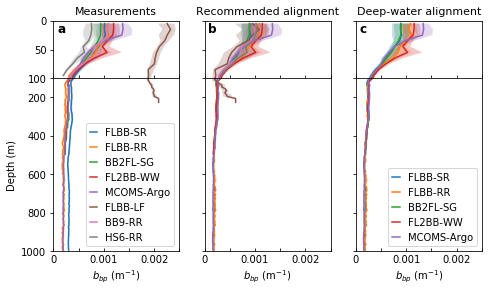

In [13]:
fig,ax = plt.subplots(2,3,figsize=(7,4))

for a in ax[:,0]:
    a.plot(np.nanmedian(SR_bbp,axis=0),dep,label='FLBB-SR')
    a.plot(np.nanmedian(RR_bbp,axis=0),dep,label='FLBB-RR')
    a.plot(np.nanmedian(SG_bbp,axis=0),dep,label='BB2FL-SG')
    a.plot(np.nanmedian(WW_bbp,axis=0),dep,label='FL2BB-WW')
    a.plot(np.nanmedian(Argo_bbp,axis=0),dep,label='MCOMS-Argo')
    a.plot(np.nanmedian(LF_bbp,axis=0),dep,label='FLBB-LF')
    a.plot(np.nanmedian(BB9_bbp,axis=0),dep,label='BB9-RR')
    a.plot(np.nanmedian(HS6_bbp,axis=0),dep,label='HS6-RR')

    a.fill_betweenx(dep,*np.nanpercentile(SR_bbp,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(RR_bbp,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(SG_bbp,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(WW_bbp,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(Argo_bbp,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(LF_bbp,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(BB9_bbp,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(HS6_bbp,[25,75],axis=0),alpha=0.25)

for a in ax[:,1]:
    a.plot(calib_SR(np.nanmedian(SR_bbp,axis=0)),dep,label='FLBB-SR')
    a.plot(calib_RR(np.nanmedian(RR_bbp,axis=0)),dep,label='FLBB-RR')
    a.plot(calib_SG(np.nanmedian(SG_bbp,axis=0)),dep,label='BB2FL-SG')
    a.plot(calib_WW(np.nanmedian(WW_bbp,axis=0)),dep,label='FL2BB-WW')
    a.plot(calib_Argo(np.nanmedian(Argo_bbp,axis=0)),dep,label='MCOMS-Argo')
    a.plot(calib_LF(np.nanmedian(LF_bbp,axis=0)),dep,label='FLBB-LF')
    a.plot(calib_BB9(np.nanmedian(BB9_bbp,axis=0)),dep,label='BB9-RR')
    a.plot(calib_HS6(np.nanmedian(HS6_bbp,axis=0)),dep,label='HS6-RR')

    a.fill_betweenx(dep,*calib_SR(np.nanpercentile(SR_bbp,[25,75],axis=0)),alpha=0.25)
    a.fill_betweenx(dep,*calib_RR(np.nanpercentile(RR_bbp,[25,75],axis=0)),alpha=0.25)
    a.fill_betweenx(dep,*calib_SG(np.nanpercentile(SG_bbp,[25,75],axis=0)),alpha=0.25)
    a.fill_betweenx(dep,*calib_WW(np.nanpercentile(WW_bbp,[25,75],axis=0)),alpha=0.25)
    a.fill_betweenx(dep,*calib_Argo(np.nanpercentile(Argo_bbp,[25,75],axis=0)),alpha=0.25)
    a.fill_betweenx(dep,*calib_LF(np.nanpercentile(LF_bbp,[25,75],axis=0)),alpha=0.25)
    a.fill_betweenx(dep,*calib_BB9(np.nanpercentile(BB9_bbp,[25,75],axis=0)),alpha=0.25)
    a.fill_betweenx(dep,*calib_HS6(np.nanpercentile(HS6_bbp,[25,75],axis=0)),alpha=0.25)
    
for a in ax[:,2]:
    a.plot(np.nanmedian(SR_bbp,axis=0)-SR_deepval+RR_deepval,dep,label='FLBB-SR')
    a.plot(np.nanmedian(RR_bbp,axis=0)-RR_deepval+RR_deepval,dep,label='FLBB-RR')
    a.plot(np.nanmedian(SG_bbp,axis=0)-SG_deepval+RR_deepval,dep,label='BB2FL-SG')
    a.plot(np.nanmedian(WW_bbp,axis=0)-WW_deepval+RR_deepval,dep,label='FL2BB-WW')
    a.plot(np.nanmedian(Argo_bbp,axis=0)-Argo_deepval+RR_deepval,dep,label='MCOMS-Argo')

    a.fill_betweenx(dep,*np.nanpercentile(SR_bbp-SR_deepval+RR_deepval,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(RR_bbp-RR_deepval+RR_deepval,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(SG_bbp-SG_deepval+RR_deepval,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(WW_bbp-WW_deepval+RR_deepval,[25,75],axis=0),alpha=0.25)
    a.fill_betweenx(dep,*np.nanpercentile(Argo_bbp-Argo_deepval+RR_deepval,[25,75],axis=0),alpha=0.25)

ax[0,0].set_position([.1,.7,.25,.2])
ax[1,0].set_position([.1,.1,.25,.6])
ax[0,1].set_position([.4,.7,.25,.2])
ax[1,1].set_position([.4,.1,.25,.6])
ax[0,2].set_position([.7,.7,.25,.2])
ax[1,2].set_position([.7,.1,.25,.6])

for a in ax.ravel():
    a.set_xlim([0,0.0025])
    a.set_xticks(np.arange(0,0.003,0.0005))
    a.tick_params(axis='x',direction='in')
for a in ax[0]:
    a.set_ylim([100,0])
    a.set_xticklabels([])
for a in ax[1]:
    a.set_ylim([1000,100])
    a.set_xticklabels(['0',' ','0.001',' ','0.002',' '])
    a.set_xlabel('$b_{bp}$ (m$^{-1}$)')
for a in ax[:,1::].ravel():
    a.set_yticklabels([])
ax[1,0].set_ylabel('Depth (m)')

    
ax[0,0].set_title('Measurements',fontsize=11)
ax[0,1].set_title('Recommended alignment',fontsize=11)
ax[0,2].set_title('Deep-water alignment',fontsize=11)


ax[1,0].legend(loc='lower right',handlelength=.75)
ax[1,2].legend(loc='lower right',handlelength=.75)

ax[0,0].annotate('a',(.03,.8),xycoords='axes fraction',weight='bold',fontsize=12)
ax[0,1].annotate('b',(.03,.8),xycoords='axes fraction',weight='bold',fontsize=12)
ax[0,2].annotate('c',(.03,.8),xycoords='axes fraction',weight='bold',fontsize=12)

plt.savefig('bbp_all.png',dpi=300)